## Stocks & Covid

In this notebook, we'll see how the stock of some large corporations performed when the pandemic swept the world.
To accomplish this, we'll use the Yahoo finance data and Covid cases data made available by the New York Times.

For starts, let's install the required packages and do some setup

In [9]:
%%capture
!pip install yfinance

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np

# Plotting libraries
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 6)
plt.style.use('seaborn-darkgrid')

Next, we download the stock market data for 4 big companies. We'll look at some companies that we expect to have performed well due to lockdown times, and some companies that we expect have suffered from the travel restrictions imposed almost worldwide.

In [42]:
# %%capture
tickers = ["MSFT", "NFLX", "BKNG", "AAL"]
data = yf.download(" ".join(tickers), start="2020-01-01", end="2021-09-26")

[*********************100%***********************]  4 of 4 completed


Let's plot all closing prices over time

<AxesSubplot:xlabel='Date'>

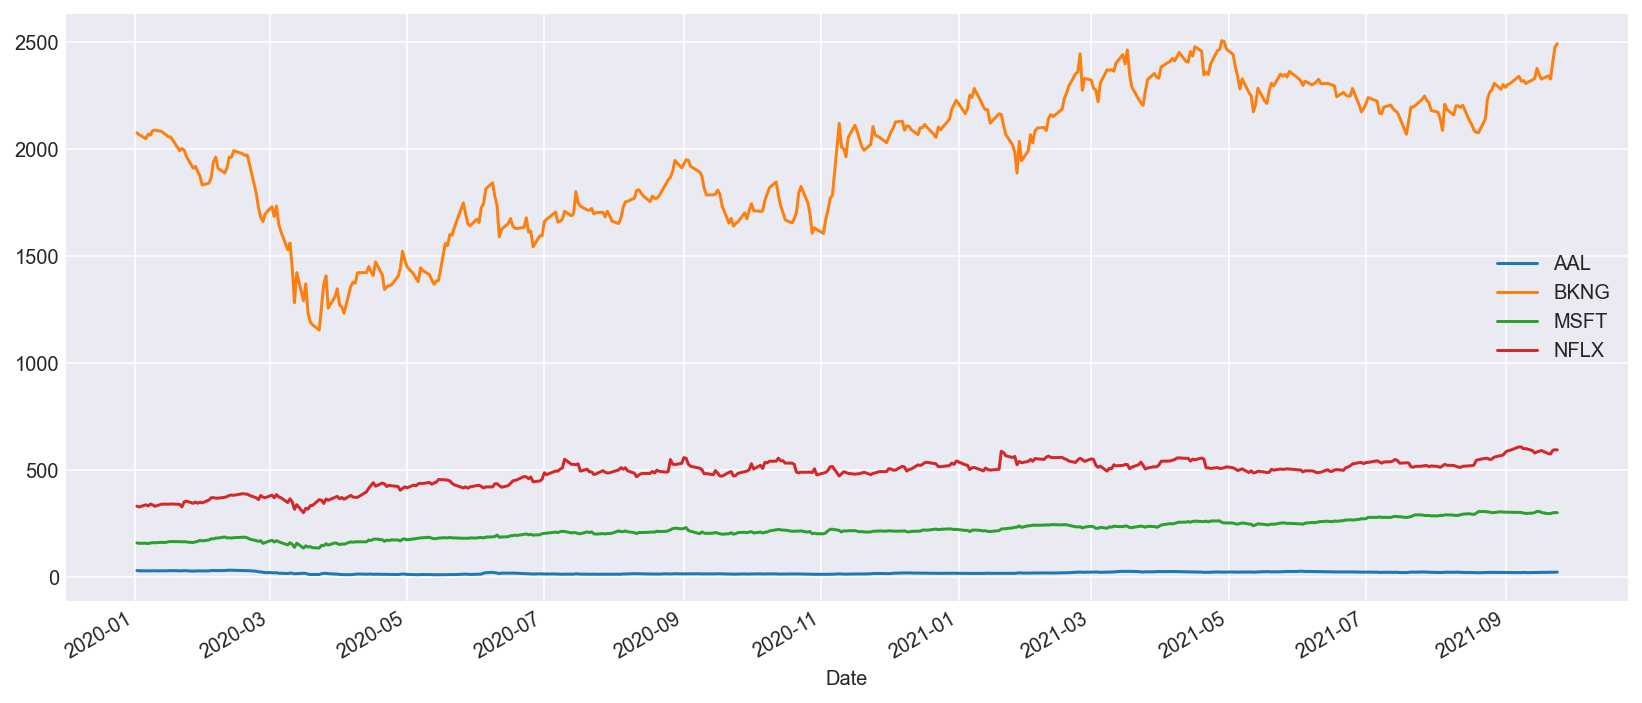

In [38]:
closes = data['Adj Close']
closes.plot()

# closes['AAPL_MIN'] = closes.iloc[argrelextrema(closes.AAPL.values, np.less_equal,
#                     order=21)[0]]['AAPL']
# closes['SPOT_MIN'] = closes.iloc[argrelextrema(closes.SPOT.values, np.less_equal,
#                     order=21)[0]]['SPOT']
# closes['MSFT_MIN'] = closes.iloc[argrelextrema(closes.MSFT.values, np.less_equal,
#                     order=21)[0]]['MSFT']

It's hard to see the trend in all these stocks because the prices of a share differ so wildly. Let's normalize the value so we remap the values between the lowest and the highest price.

<AxesSubplot:xlabel='Date'>

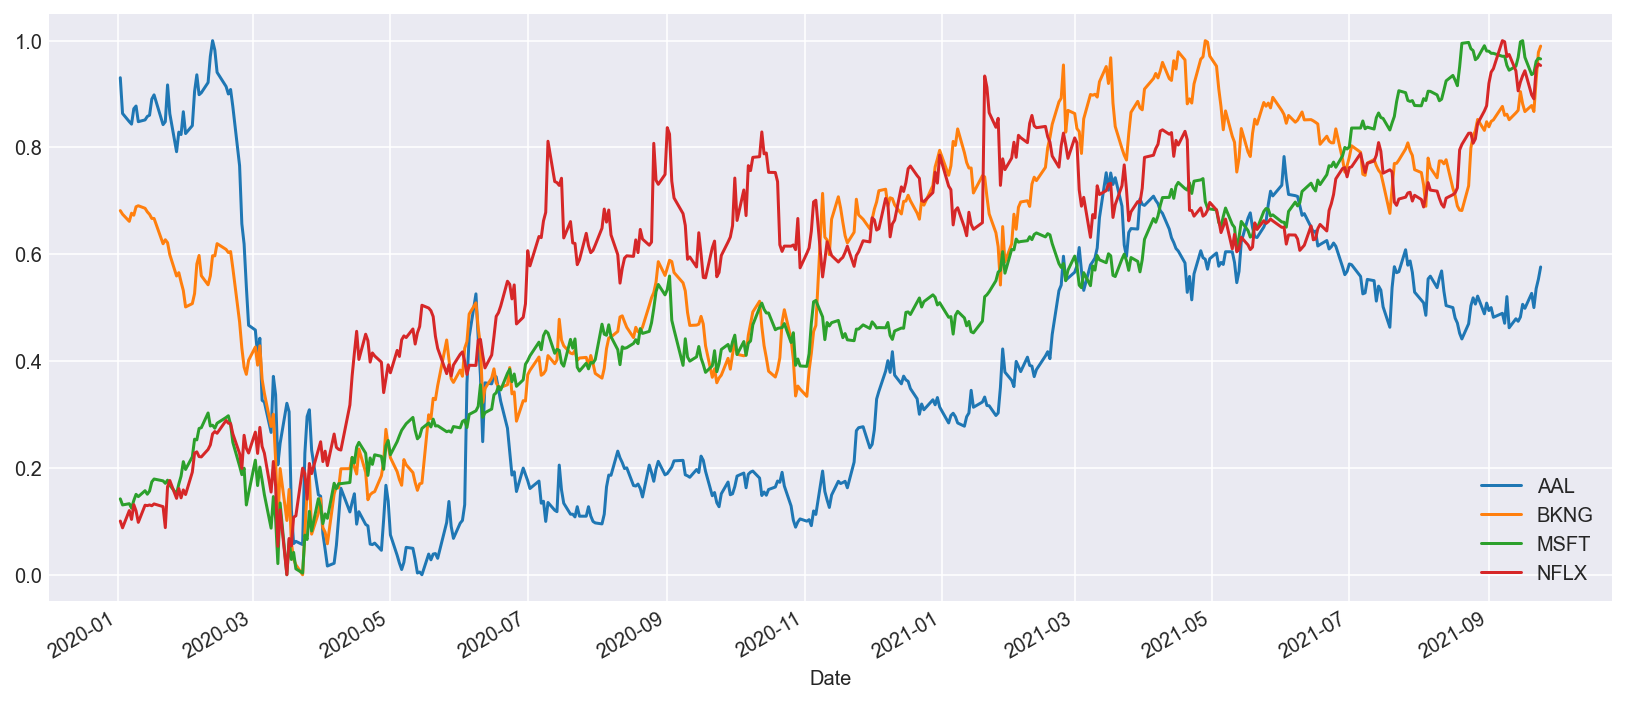

In [39]:
for i in tickers:
    closes[i] = (closes[i] - closes[i].min()) / (closes[i].max() - closes[i].min())
    
closes.plot()

We clearly see a sharp drop around March 2020, across all stocks. Let's overlay this data with the number of covid cases to see if there is a connection.

In [40]:
import pandas as pd
import numpy as np
covid = pd.read_csv("covid_cases.csv", index_col = 'date', usecols = ['date', 'cases'])
covid.index = pd.to_datetime(covid.index)

# uncumsum the plot
cumsum = covid['cases'].to_numpy()
cumsum_shifted = np.insert(np.delete(cumsum, -1), 0, 0)
uncumsum = cumsum - cumsum_shifted
covid['cases'] = uncumsum
covid['cases_rolling'] = covid.rolling(window=7).mean()

<AxesSubplot:label='8225605c-6efa-4339-aa94-5ac78e6609d5', xlabel='date'>

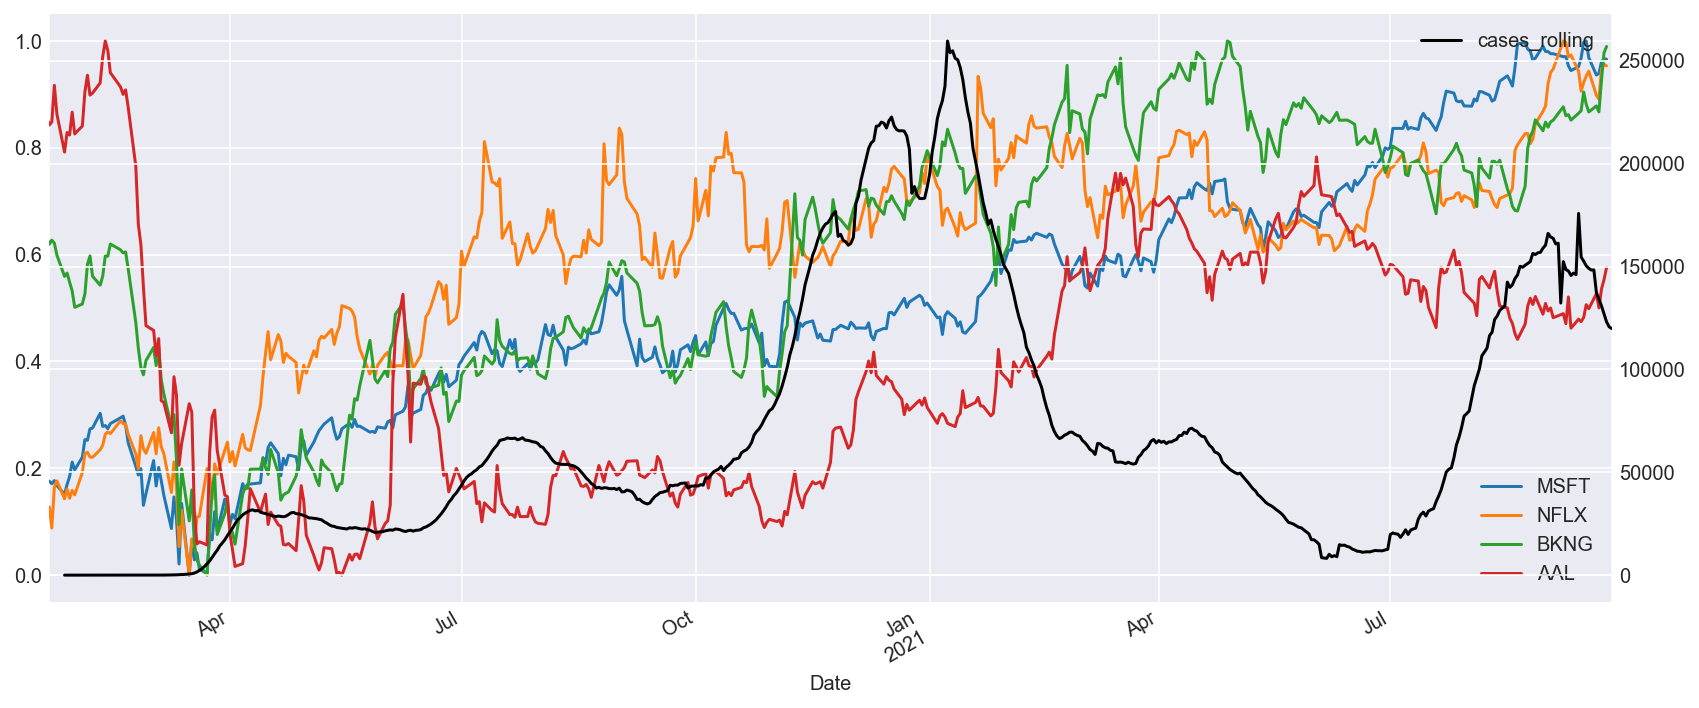

In [41]:
ax = closes.plot(y = tickers)
ax1 = ax.twinx()
covid.plot(y = 'cases_rolling', c = 'black', ax = ax1)

Interestingly, the sharp decline in value already happened way before the number of cases in the United States started to skyrocket.
By the time the pandemic was sweeping across the country in full force, some stocks, like MSFT had already rebounded to levels seen before Covid.
By the time the second wave was behind us, Both Msft, Netflix and Even booking were again at the same or higher levels than before Covid.
Only American Airlines is still struggling to recover.